In [27]:
from pylab import mpl
import pandas as pd
import talib
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

In [28]:
df = pd.read_excel("600859_stock_k_data.xlsx",sheet_name="600859_stock_k_data",header=0,index_col=0)

In [29]:
cci= talib.CCI(df.high, df.low, df.close, 14)
df['cci']=cci

In [4]:
df2=df['turn']

In [23]:
df2.describe()

count    133.000000
mean       4.297461
std        3.447481
min        0.335000
25%        1.750400
50%        3.259900
75%        6.069500
max       14.003400
Name: turn, dtype: float64

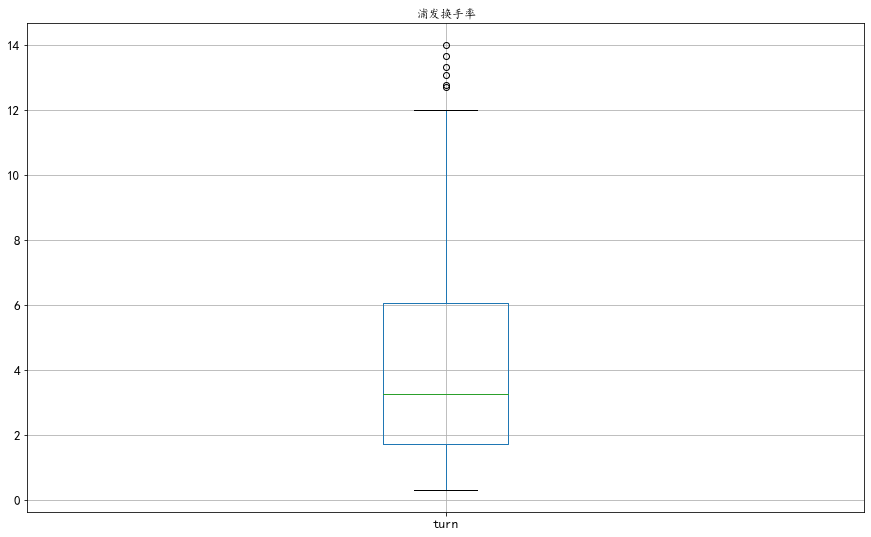

In [24]:
df2.plot(kind="box",figsize=(15,9),title="浦发换手率",grid=True,fontsize=13)

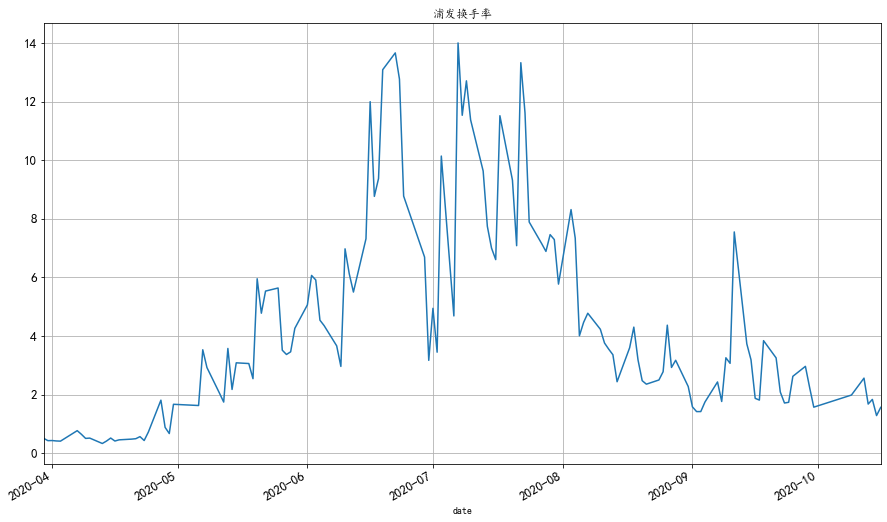

In [6]:
df2.plot(kind="line",figsize=(15,9),title="浦发换手率",grid=True,fontsize=13)

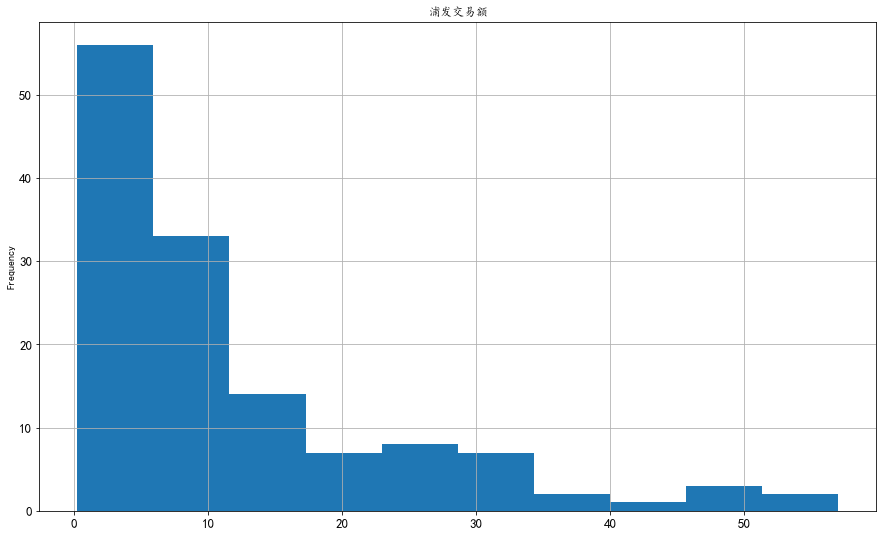

In [7]:
df3=df['amount']/100000000
df3.plot(kind="hist",figsize=(15,9),title="浦发交易额",grid=True,fontsize=13)

In [8]:
df3.describe()

count    133.000000
mean      11.734533
std       12.442888
min        0.228866
25%        3.375701
50%        7.390467
75%       15.314446
max       56.998300
Name: amount, dtype: float64

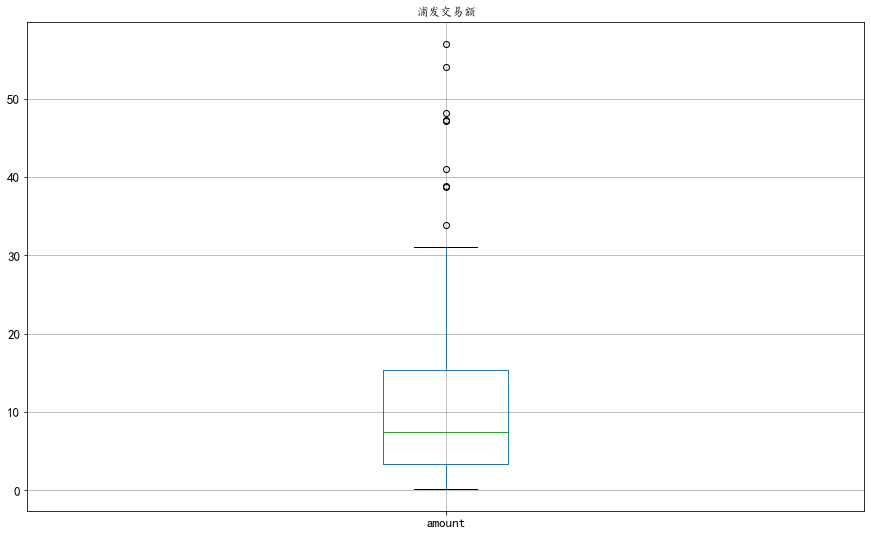

In [9]:
df3.plot(kind="box",figsize=(15,9),title="浦发交易额",grid=True,fontsize=13)

In [10]:
df4=df[['open','high','low','close']]

In [11]:
df4.head()

,open,high,low,close
date,,,,
2020-03-30,12.11,12.18,11.98,12.11
2020-03-31,12.14,12.25,12.07,12.17
2020-04-01,12.13,12.18,11.99,12.00
2020-04-02,11.98,12.09,11.90,12.08
2020-04-03,12.07,12.10,11.95,11.99


D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F82799D30>,
      dtype=object)

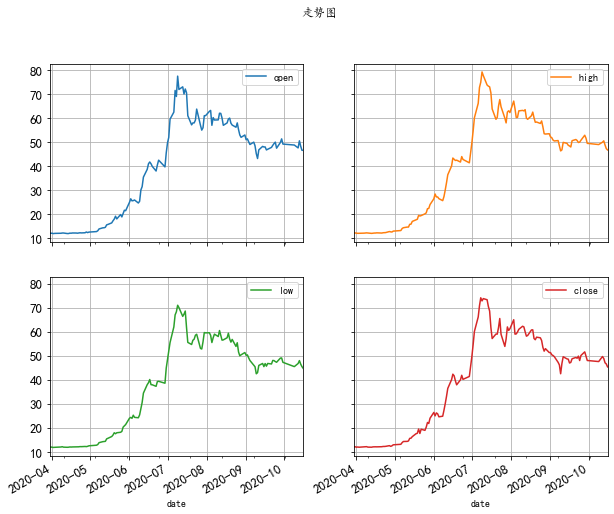

In [12]:
df4.plot(kind="line",subplots=True,sharex=True,sharey=True,layout=(2,2),figsize=(10,8),title="走势图",grid=True,fontsize=13)

In [30]:
df5=df[['open','high','low','close','turn','amount','cci']]

D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F846AB470>,
      dtype=object)

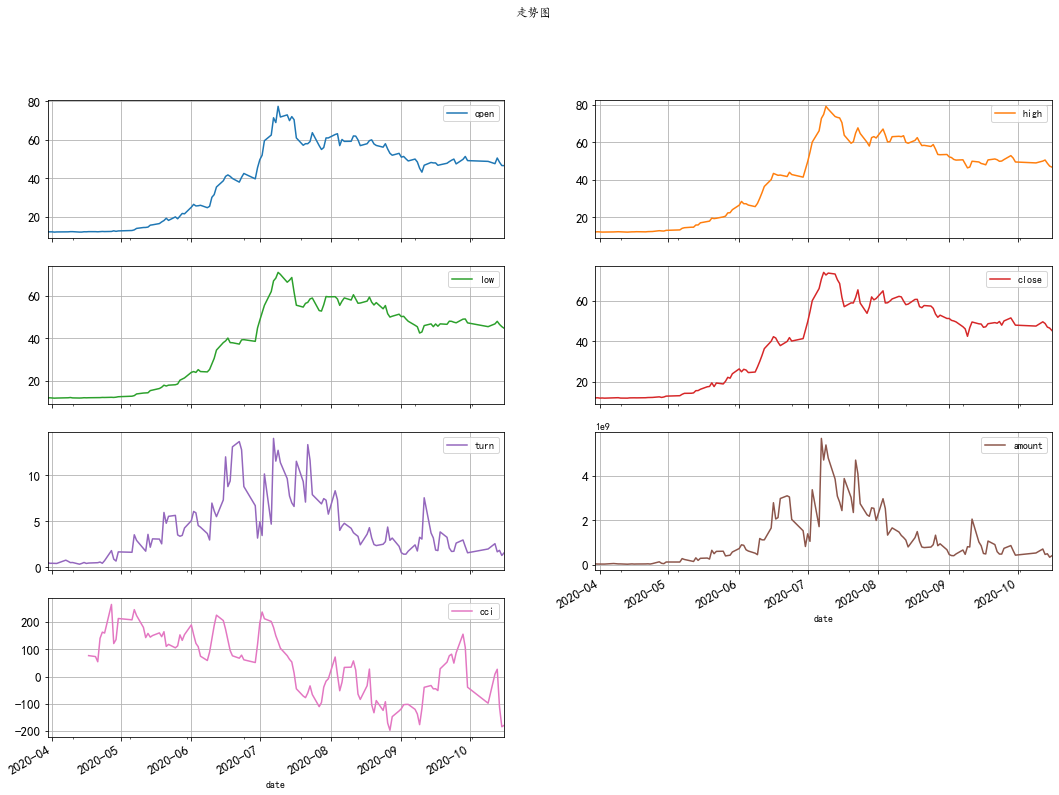

In [31]:
df5.plot(kind="line",subplots=True,sharex=True,layout=(4,2),figsize=(18,13),title="走势图",grid=True,fontsize=13)

In [ ]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.600859",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2019-06-01', end_date='2020-10-31',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####   
result.to_csv("600859_stock_k_data.csv", index=False)
print(result)

#### 登出系统 ####
bs.logout()

In [25]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取上证50成分股
rs = bs.query_sz50_stocks()
print('query_sz50 error_code:'+rs.error_code)
print('query_sz50  error_msg:'+rs.error_msg)

# 打印结果集
sz50_stocks = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    sz50_stocks.append(rs.get_row_data())
result = pd.DataFrame(sz50_stocks, columns=rs.fields)
# 结果集输出到csv文件
result.to_csv("D:/sz50_stocks.csv", encoding="gbk", index=False)
print(result)

# 登出系统
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_sz50 error_code:0
query_sz50  error_msg:success
    updateDate       code code_name
0   2020-10-12  sh.600000      浦发银行
1   2020-10-12  sh.600009      上海机场
2   2020-10-12  sh.600016      民生银行
3   2020-10-12  sh.600028      中国石化
4   2020-10-12  sh.600030      中信证券
5   2020-10-12  sh.600031      三一重工
6   2020-10-12  sh.600036      招商银行
7   2020-10-12  sh.600048      保利地产
8   2020-10-12  sh.600050      中国联通
9   2020-10-12  sh.600104      上汽集团
10  2020-10-12  sh.600196      复星医药
11  2020-10-12  sh.600276      恒瑞医药
12  2020-10-12  sh.600309      万华化学
13  2020-10-12  sh.600519      贵州茅台
14  2020-10-12  sh.600547      山东黄金
15  2020-10-12  sh.600585      海螺水泥
16  2020-10-12  sh.600588      用友网络
17  2020-10-12  sh.600690      海尔智家
18  2020-10-12  sh.600703      三安光电
19  2020-10-12  sh.600745      闻泰科技
20  2020-10-12  sh.600837      海通证券
21  2020-10-12  sh.600887      伊利股份
22  2020-10-12  sh.601012      隆基股份
23  202